In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,GlobalMaxPooling1D,Conv1D,Input,MaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
df=pd.read_csv('./datasets/bbc_text_cls.csv')

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
df['targets']=df['labels'].astype("category").cat.codes

In [5]:
#number of classes
K=df['targets'].max()+1
K

5

In [6]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [7]:
#convert sentences to sequences
MAX_VOCAB_SIZE=2000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train=tokenizer.texts_to_sequences(df_train['text'])
sequences_test=tokenizer.texts_to_sequences(df_test['text'])

In [9]:
#get word->integer mapping
word2idx=tokenizer.word_index
V=len(word2idx)
print("found %s unique tokens" %V)

found 27461 unique tokens


In [10]:
#pad sequences to get NxT matrix
data_train=pad_sequences(sequences_train)
print("shape of data_train tensor: ",data_train.shape)

#get sequence length
T=data_train.shape[1]

shape of data_train tensor:  (1557, 2831)


In [13]:
data_test=pad_sequences(sequences_test, maxlen=T)
print("shape of data_test tensor: ",data_test.shape)

shape of data_test tensor:  (668, 2831)


In [14]:
#create model

#embedding size
D=50

i=Input(shape=(T,))
l1=Embedding(V+1,D)(i)
l2=Conv1D(32,3, activation='relu')(l1)
l3=GlobalMaxPooling1D()(l2)
x=Dense(K)(l3)

model=Model(i,x)

In [15]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
history=model.fit(data_train,df_train['targets'],epochs=50,validation_data=[data_test,df_test['targets']])

Epoch 1/50
49/49 [==============================] - 9s 159ms/step - loss: 1.5571 - accuracy: 0.3963 - val_loss: 1.5028 - val_accuracy: 0.3982
Epoch 2/50
49/49 [==============================] - 7s 143ms/step - loss: 1.3366 - accuracy: 0.6217 - val_loss: 1.2072 - val_accuracy: 0.7231
Epoch 3/50
49/49 [==============================] - 7s 143ms/step - loss: 0.9301 - accuracy: 0.8080 - val_loss: 0.7747 - val_accuracy: 0.8278
Epoch 4/50
49/49 [==============================] - 7s 143ms/step - loss: 0.5281 - accuracy: 0.9133 - val_loss: 0.4676 - val_accuracy: 0.9147
Epoch 5/50
49/49 [==============================] - 7s 146ms/step - loss: 0.2887 - accuracy: 0.9621 - val_loss: 0.3193 - val_accuracy: 0.9296
Epoch 6/50
49/49 [==============================] - 8s 171ms/step - loss: 0.1735 - accuracy: 0.9769 - val_loss: 0.2568 - val_accuracy: 0.9311
Epoch 7/50
49/49 [==============================] - 7s 144ms/step - loss: 0.1153 - accuracy: 0.9865 - val_loss: 0.2242 - val_accuracy: 0.9371
Epoch 

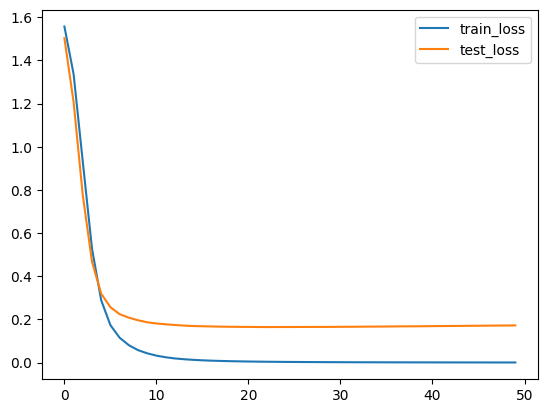

In [17]:
#plot loss per epoch
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label="test_loss")
plt.legend()

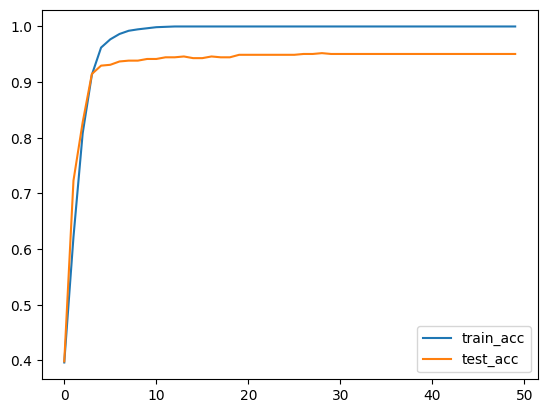

In [18]:
#plot accuracy per epoch
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label="test_acc")
plt.legend()